In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

# 1. Data Overviiew

In [20]:
data= pd.read_csv(r"C:\Users\Lenovo\analyst_pkl\data\cleanedData.csv", sep=';')
data.head(5)

,ID Resolver,Nama Resolver,Grup Resolver,Durations,Total Project,Total Time,Usia,Kualifikasi,Lama Kerja,Kelas Keahlian
0,69,Febrian Hilmi Firdaus,DSO,5,10,3831,48,S2,13,Utama
1,4,Azhar Mashuri,DIP,0,51,3734,28,S1,24,Madya
2,74,Hayan .,DSO,0,6,2043,22,Lulus SMA,69,Madya
3,62,Villa Nanda,DIP,1,20,754,22,Lulus SMA,122,Muda
4,41,Ghazi Muwaffaq,DSO,52,5,7052,24,Lulus SMA,135,Utama


# 2. Data Prep

In [21]:
#removing unwanted signs
data['Nama Resolver'] = data['Nama Resolver'].str.replace('.', '', regex=False).str.strip()
data['Nama Resolver'] = data['Nama Resolver'].str.replace('-', '', regex=False).str.strip()
data.head(5)

,ID Resolver,Nama Resolver,Grup Resolver,Durations,Total Project,Total Time,Usia,Kualifikasi,Lama Kerja,Kelas Keahlian
0,69,Febrian Hilmi Firdaus,DSO,5,10,3831,48,S2,13,Utama
1,4,Azhar Mashuri,DIP,0,51,3734,28,S1,24,Madya
2,74,Hayan,DSO,0,6,2043,22,Lulus SMA,69,Madya
3,62,Villa Nanda,DIP,1,20,754,22,Lulus SMA,122,Muda
4,41,Ghazi Muwaffaq,DSO,52,5,7052,24,Lulus SMA,135,Utama


## Categorical Data

source https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd

In [22]:
#objt(str) to category
data['Grup Resolver'] = data['Grup Resolver'].astype('category')
data['Nama Resolver'] = data['Nama Resolver'].astype('category')
data['Kualifikasi'] = data['Kualifikasi'].astype('category')
data['Kelas Keahlian'] = data['Kelas Keahlian'].astype('category')

In [23]:
#encoding with LabelEncoder
encoder= LabelEncoder()

In [24]:
#encoding columns for Data Corr
data['Kualifikasi_enc']= encoder.fit_transform(data['Kualifikasi'])
data['KelasKeahlian_enc']= encoder.fit_transform(data['Kelas Keahlian'])
data['GrupResolver_enc']= encoder.fit_transform(data['Grup Resolver'])
data['NamaResolver_enc']= encoder.fit_transform(data['Nama Resolver'])
data= data.drop(['Kualifikasi', 'Kelas Keahlian', 'Grup Resolver', 'Nama Resolver'], axis=1)
data.head()

,ID Resolver,Durations,Total Project,Total Time,Usia,Lama Kerja,Kualifikasi_enc,KelasKeahlian_enc,GrupResolver_enc,NamaResolver_enc
0,69,5,10,3831,48,13,2,2,6,20
1,4,0,51,3734,28,24,1,0,3,8
2,74,0,6,2043,22,69,0,0,6,23
3,62,1,20,754,22,122,0,1,3,41
4,41,52,5,7052,24,135,0,2,6,21


In [25]:
#Standardizing the data_corr columns
scaler = StandardScaler()
standardized_data = scaler.fit_transform(data)
data_corr = pd.DataFrame(standardized_data, columns=data.columns)
data_corr.head(5)

,ID Resolver,Durations,Total Project,Total Time,Usia,Lama Kerja,Kualifikasi_enc,KelasKeahlian_enc,GrupResolver_enc,NamaResolver_enc
0,0.290457,-0.355367,-0.006714,0.166211,1.325139,-1.307397,1.148391,1.252790,0.848428,-0.188311
1,-1.589341,-0.366344,3.159035,0.145610,-0.472985,-1.200472,-0.052200,-1.148391,-0.652637,-1.092203
2,0.435057,-0.366344,-0.315568,-0.213537,-1.012422,-0.763053,-1.252790,-1.148391,0.848428,0.037662
3,0.088017,-0.364149,0.765420,-0.487303,-1.012422,-0.247871,-1.252790,0.052200,-0.652637,1.393501
4,-0.519302,-0.252184,-0.392781,0.850309,-0.832610,-0.121505,-1.252790,1.252790,0.848428,-0.112987


## Data Corr [bf feature selection]

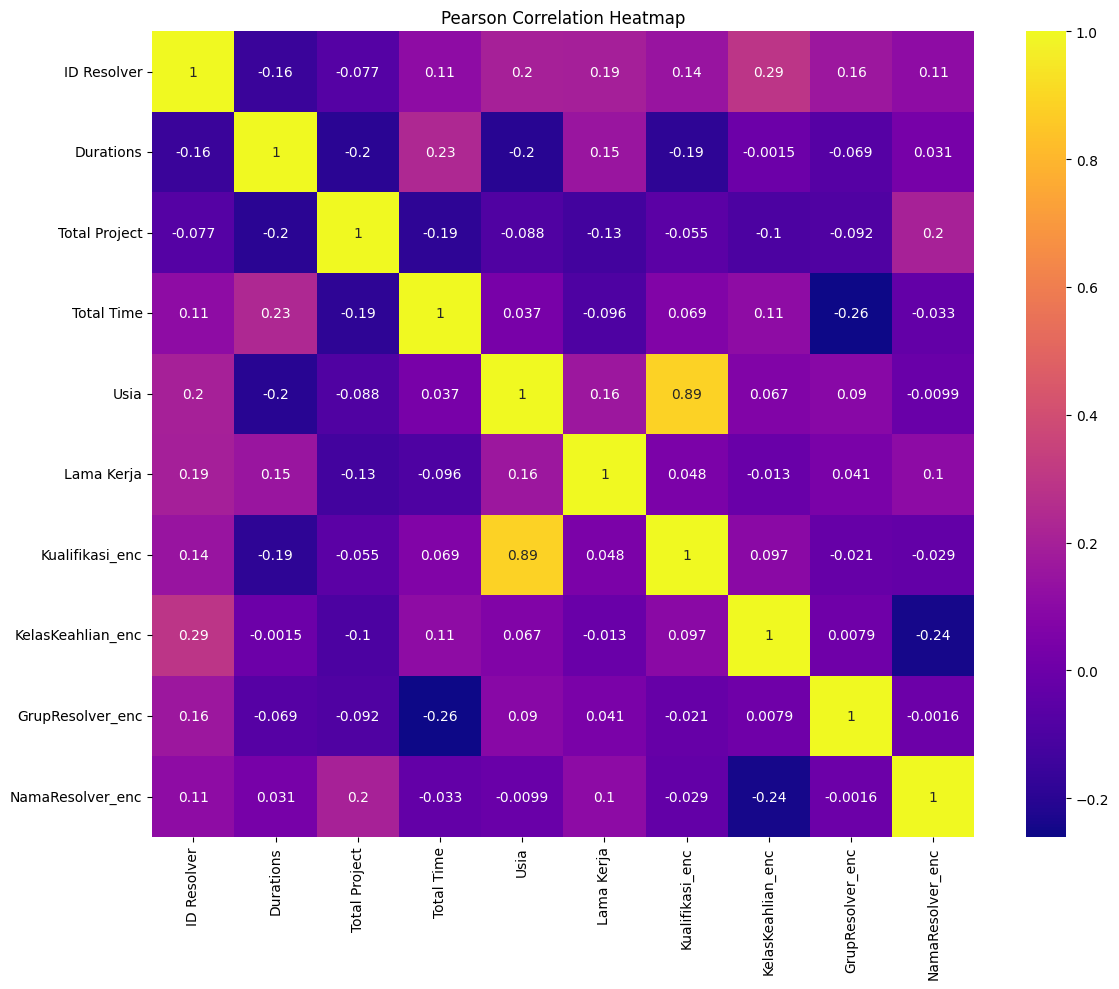

In [68]:
#data corr bf feature selection
pearson_corr = data_corr.corr(method='pearson')
plt.figure(figsize=(12, 10))
sns.heatmap(pearson_corr, annot=True, cmap='plasma')
plt.title('Pearson Correlation Heatmap')
plt.tight_layout()
plt.show()

## Data Feature Selection

source https://github.com/Abhayparashar31/feature-engineering/blob/main/Feature%20Selection%20Techniques.ipynb

In [27]:
data.head(5)

,ID Resolver,Durations,Total Project,Total Time,Usia,Lama Kerja,Kualifikasi_enc,KelasKeahlian_enc,GrupResolver_enc,NamaResolver_enc
0,69,5,10,3831,48,13,2,2,6,20
1,4,0,51,3734,28,24,1,0,3,8
2,74,0,6,2043,22,69,0,0,6,23
3,62,1,20,754,22,122,0,1,3,41
4,41,52,5,7052,24,135,0,2,6,21


In [30]:
#feature selection
X= data.drop(['ID Resolver', 'Kualifikasi_enc', 'KelasKeahlian_enc', 'NamaResolver_enc'], axis=1) 
y= data['KelasKeahlian_enc']

In [31]:
X.head(5)

,Durations,Total Project,Total Time,Usia,Lama Kerja,GrupResolver_enc
0,5,10,3831,48,13,6
1,0,51,3734,28,24,3
2,0,6,2043,22,69,6
3,1,20,754,22,122,3
4,52,5,7052,24,135,6


In [32]:
#madya= 0
#muda= 1
#utama= 2
y.head(5)

0    2
1    0
2    0
3    1
4    2
Name: KelasKeahlian_enc, dtype: int32

### Feature Importance

In [69]:
#feature importance
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [70]:
print(model.feature_importances_)

[0.16822966 0.15241102 0.19454396 0.1536041  0.19978808 0.13142318]


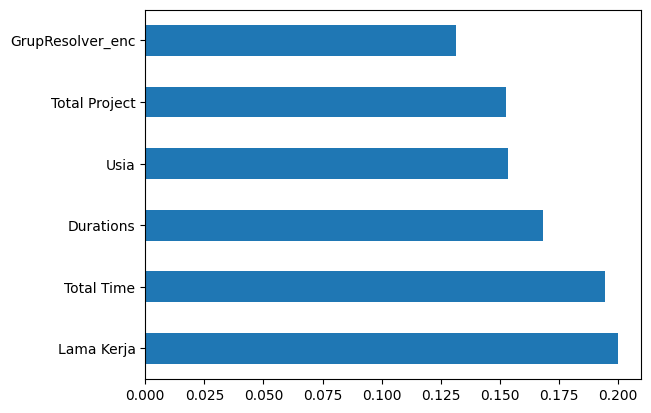

In [71]:
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(10).plot(kind='barh')
plt.show()

In [33]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 100)

In [34]:
y_train.value_counts()

KelasKeahlian_enc
0    15
2    12
1     9
Name: count, dtype: int64

In [35]:
y_test.value_counts()

KelasKeahlian_enc
1    5
2    3
0    2
Name: count, dtype: int64

In [36]:
X_train.head(5)

,Durations,Total Project,Total Time,Usia,Lama Kerja,GrupResolver_enc
0,5,10,3831,48,13,6
41,17,1,17,47,262,3
32,1,2,966,24,338,6
35,24,1,15030,29,116,2
21,1,17,77,37,89,3


## Data Normalization

In [37]:
#normalization
scaler = MinMaxScaler()
X_train_normalized = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_train_normalized.head(5)

,Durations,Total Project,Total Time,Usia,Lama Kerja,GrupResolver_enc
0,0.002019,0.18,0.185033,0.722222,0.029586,0.857143
1,0.006863,0.00,0.000773,0.694444,0.766272,0.428571
2,0.000404,0.02,0.046621,0.055556,0.991124,0.857143
3,0.009689,0.00,0.726074,0.194444,0.334320,0.285714
4,0.000404,0.32,0.003672,0.416667,0.254438,0.428571


## Data Outlier

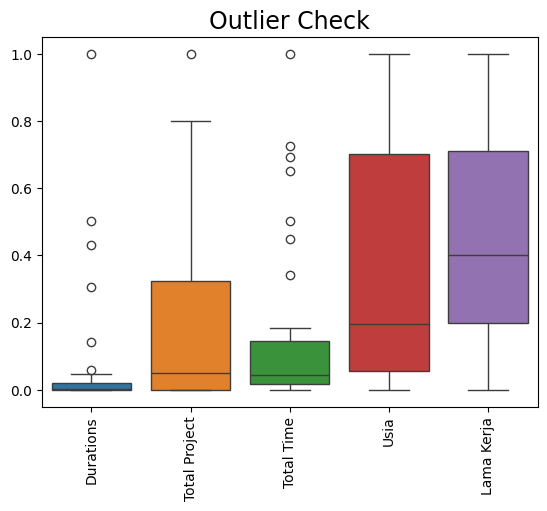

In [38]:
#identifying with Boxplot
sns.boxplot(X_train_normalized[[ 'Durations', 'Total Project', 'Total Time', 'Usia', 'Lama Kerja']])
plt.title("Outlier Check", size = 17)
plt.xticks(rotation = 90)
plt.show()

In [39]:
X_train_normalized.head(5)

,Durations,Total Project,Total Time,Usia,Lama Kerja,GrupResolver_enc
0,0.002019,0.18,0.185033,0.722222,0.029586,0.857143
1,0.006863,0.00,0.000773,0.694444,0.766272,0.428571
2,0.000404,0.02,0.046621,0.055556,0.991124,0.857143
3,0.009689,0.00,0.726074,0.194444,0.334320,0.285714
4,0.000404,0.32,0.003672,0.416667,0.254438,0.428571


### a. Durations

In [40]:
q1= X_train_normalized['Durations'].quantile(0.25)
q3= X_train_normalized['Durations'].quantile(0.75)
iqr= q3-q1
q1, q3, iqr

(0.0, 0.02008477997577715, 0.02008477997577715)

In [41]:
upper_limit= q3 + (1.5 * iqr)
lower_limit= q3 - (1.5 * iqr)
lower_limit, upper_limit

(-0.010042389987888575, 0.050211949939442876)

<Axes: ylabel='Durations'>

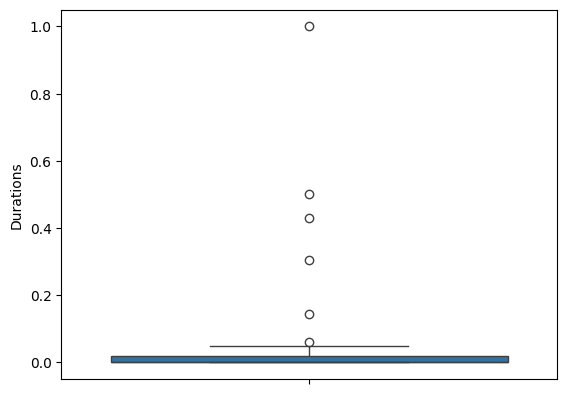

In [42]:
sns.boxplot(X_train_normalized['Durations'])

In [43]:
# find the outliers of df
X_train_normalized.loc[(X_train_normalized['Durations'] > upper_limit) | (X_train_normalized['Durations'] < lower_limit)]

,Durations,Total Project,Total Time,Usia,Lama Kerja,GrupResolver_enc
12,0.430359,0.20,0.692207,0.000000,0.559172,0.857143
14,0.502220,0.00,0.060051,0.055556,0.801775,1.000000
24,0.305612,0.02,0.134016,0.055556,0.325444,0.285714
25,0.142915,0.00,0.090053,0.250000,0.201183,1.000000
28,0.059346,0.00,0.018986,1.000000,0.855030,1.000000
32,1.000000,0.02,0.449297,0.194444,0.695266,0.285714


In [44]:
#trimming
X_train_nD= X_train_normalized.loc[(X_train_normalized['Durations'] < upper_limit) & (X_train_normalized['Durations'] > lower_limit)]
print('before removing outliers:', len(X_train_normalized))
print('after removing outliers:', len(X_train_nD))
print('outliers:', len(X_train_normalized) - len(X_train_nD))

before removing outliers: 36
after removing outliers: 30
outliers: 6


<Axes: ylabel='Durations'>

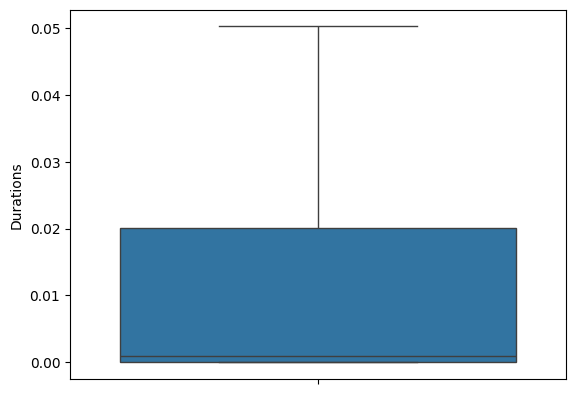

In [45]:
#capping: changing the outlier values to upper/lower limit values
X_train_nD = X_train_normalized.copy()
X_train_nD.loc[X_train_nD['Durations'] > upper_limit, 'Durations'] = upper_limit
X_train_nD.loc[X_train_nD['Durations'] < lower_limit, 'Durations'] = lower_limit
sns.boxplot(X_train_nD['Durations'])

### b. Total Project

In [46]:
q1= X_train_normalized['Total Project'].quantile(0.25)
q3= X_train_normalized['Total Project'].quantile(0.75)
iqr= q3-q1
q1, q3, iqr

(0.0, 0.325, 0.325)

In [47]:
upper_limit= q3 + (1.5 * iqr)
lower_limit= q3 - (1.5 * iqr)
lower_limit, upper_limit

(-0.16250000000000003, 0.8125)

<Axes: ylabel='Total Project'>

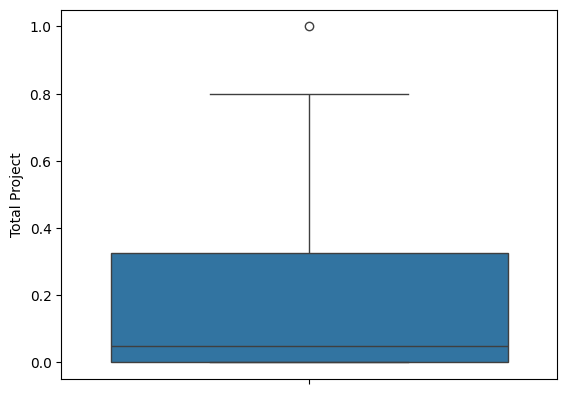

In [48]:
sns.boxplot(X_train_normalized['Total Project'])

In [49]:
# find the outliers of df
X_train_normalized.loc[(X_train_normalized['Total Project'] > upper_limit) | (X_train_normalized['Total Project'] < lower_limit)]

,Durations,Total Project,Total Time,Usia,Lama Kerja,GrupResolver_enc
11,0.0,1.0,0.180347,0.166667,0.06213,0.428571


In [50]:
#trimming
X_train_nP= X_train_normalized.loc[(X_train_normalized['Total Project'] < upper_limit) & (X_train_normalized['Total Project'] > lower_limit)]
print('before removing outliers:', len(X_train_normalized))
print('after removing outliers:', len(X_train_nP))
print('outliers:', len(X_train_normalized) - len(X_train_nP))

before removing outliers: 36
after removing outliers: 35
outliers: 1


<Axes: ylabel='Total Project'>

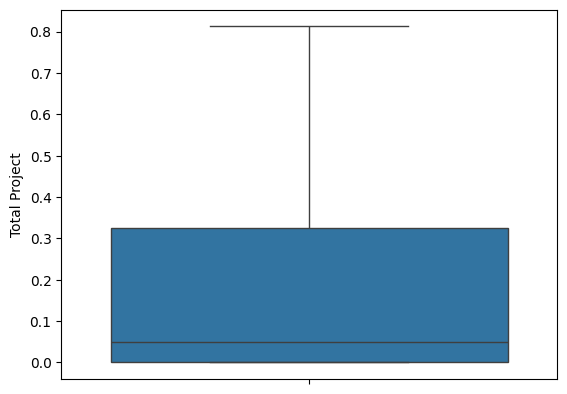

In [51]:
#capping: changing the outlier values to upper/lower limit values
X_train_nP = X_train_normalized.copy()
X_train_nP.loc[X_train_nP['Total Project'] > upper_limit, 'Total Project'] = upper_limit
X_train_nP.loc[X_train_nP['Total Project'] < lower_limit, 'Total Project'] = lower_limit
sns.boxplot(X_train_nP['Total Project'])

### c. Total Time

In [52]:
q1= X_train_normalized['Total Time'].quantile(0.25)
q3= X_train_normalized['Total Time'].quantile(0.75)
iqr= q3-q1
q1, q3, iqr

(0.018273829653606452, 0.14559882119909176, 0.12732499154548532)

In [53]:
upper_limit= q3 + (1.5 * iqr)
lower_limit= q3 - (1.5 * iqr)
lower_limit, upper_limit

(-0.04538866611913622, 0.33658630851731974)

<Axes: ylabel='Total Time'>

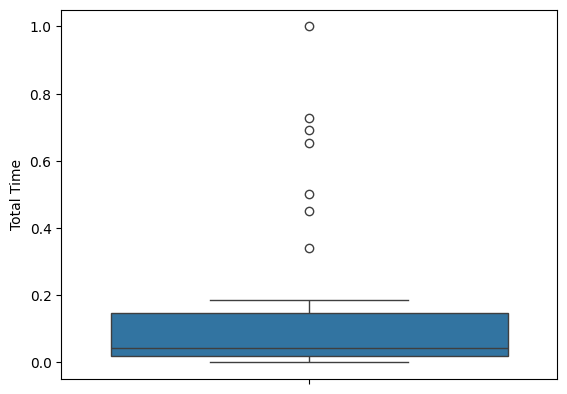

In [54]:
sns.boxplot(X_train_normalized['Total Time'])

In [55]:
# find the outliers of df
X_train_normalized.loc[(X_train_normalized['Total Time'] > upper_limit) | (X_train_normalized['Total Time'] < lower_limit)]

,Durations,Total Project,Total Time,Usia,Lama Kerja,GrupResolver_enc
3,0.009689,0.00,0.726074,0.194444,0.334320,0.285714
6,0.000404,0.00,0.651529,0.388889,0.633136,0.142857
12,0.430359,0.20,0.692207,0.000000,0.559172,0.857143
20,0.018167,0.04,1.000000,0.833333,0.414201,0.285714
21,0.020993,0.08,0.340644,0.055556,0.390533,0.857143
23,0.019782,0.00,0.500845,0.138889,0.000000,0.142857
32,1.000000,0.02,0.449297,0.194444,0.695266,0.285714


In [56]:
#trimming
X_train_nT= X_train_normalized.loc[(X_train_normalized['Total Time'] < upper_limit) & (X_train_normalized['Total Time'] > lower_limit)]
print('before removing outliers:', len(X_train_normalized))
print('after removing outliers:', len(X_train_nT))
print('outliers:', len(X_train_normalized) - len(X_train_nT))

before removing outliers: 36
after removing outliers: 29
outliers: 7


<Axes: ylabel='Total Project'>

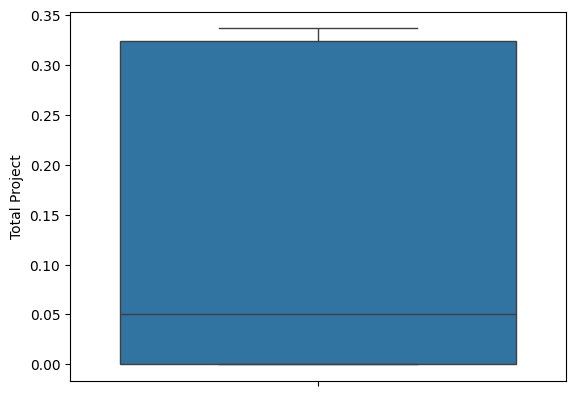

In [57]:
#capping: changing the outlier values to upper/lower limit values
X_train_nP = X_train_normalized.copy()
X_train_nP.loc[X_train_nP['Total Project'] > upper_limit, 'Total Project'] = upper_limit
X_train_nP.loc[X_train_nP['Total Project'] < lower_limit, 'Total Project'] = lower_limit

sns.boxplot(X_train_nP['Total Project'])

## Concating Data Outliers

In [58]:
X_train = pd.concat([X_train_normalized, X_train_nD, X_train_nP, X_train_nT], axis=1)
X_train = X_train.loc[:, ~X_train.columns.duplicated()]
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Durations         36 non-null     float64
 1   Total Project     36 non-null     float64
 2   Total Time        36 non-null     float64
 3   Usia              36 non-null     float64
 4   Lama Kerja        36 non-null     float64
 5   GrupResolver_enc  36 non-null     float64
dtypes: float64(6)
memory usage: 1.8 KB


# 3. Data Setup

## SMOTE (Synthetic Minority Over-sampling Technique)

In [ ]:
#Using imblearn library to apply SMOTE:
#from collections import Counter
#smote = SMOTE(random_state=42)
#X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
#print(f'Original dataset shape: {Counter(y_train)}')
#print(f'Resampled dataset shape: {Counter(y_train_resampled)}')

In [ ]:
#Using Random Oversampling and Undersampling:
#from imblearn.over_sampling import RandomOverSampler
#from imblearn.under_sampling import RandomUnderSampler
#oversampling
#ros = RandomOverSampler(random_state=42)
#X_train_oversampled, y_train_oversampled = ros.fit_resample(X_train, y_train)
#unersampling
#rus = RandomUnderSampler(random_state=42)
#X_train_undersampled, y_train_undersampled = rus.fit_resample(X_train, y_train)
#print(f'Oversampled dataset shape: {Counter(y_train_oversampled)}')
#print(f'Undersampled dataset shape: {Counter(y_train_undersampled)}')


## Hyperparameter grid

# 3. Data Model

## a. DecisionTreeClassifier

In [59]:
dt = tree.DecisionTreeClassifier()

In [60]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
#best_model = grid_search.best_estimator_

# 4. Data Eval

## a. DecisionTreeClassifier

In [61]:
predict= dt.predict(X_test)
predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
#y_pred = best_model.predict(X_test)

In [62]:
y_test

6     2
17    0
20    1
38    2
42    1
45    0
5     1
29    1
27    1
33    2
Name: KelasKeahlian_enc, dtype: int32

In [63]:
cm= confusion_matrix(y_test, predict)
cm

array([[0, 2, 0],
       [0, 5, 0],
       [0, 3, 0]], dtype=int64)

In [64]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.50      1.00      0.67         5
           2       0.00      0.00      0.00         3

    accuracy                           0.50        10
   macro avg       0.17      0.33      0.22        10
weighted avg       0.25      0.50      0.33        10



In [66]:
#accuracy = accuracy_score(y_test, predict)
#print("Accuracy:", accuracy)